In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set seed for reproducibility
SEED = 1732466
np.random.seed(SEED)

400


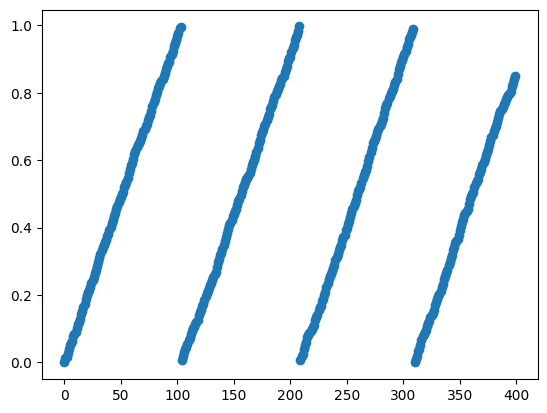

In [3]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1]) % 1
    return traj

x = 0
v = np.pi / 320
omega = 10
n = 400
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
print(len(traj))
plt.scatter(np.arange(n), traj)

Fourier basis

C:\Users\sunsh\AppData\Local\Temp\ipykernel_2884\1214705749.py:38: RuntimeWarning: invalid value encountered in scalar divide
  trueevalues = [np.sin(j*np.pi*delta)/(j*np.pi*delta)*np.exp(2*np.pi*j*v*(0+1j)) for j in np.arange(-200,200,1)]


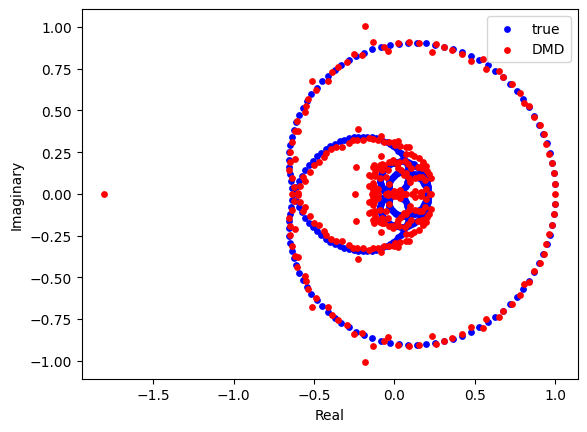

In [4]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1]) % 1
    return traj

def get_obsvervation_noisy_rotation(n1, traj):
    f = np.zeros((2*n1+1, len(traj)))
    for i in range(n1):
        f[i,:] = np.cos(2*i*np.pi*traj)
        f[i+n1,:] = np.sin(2*i*np.pi*traj)
        f[-1,:] = traj*0 + 1
    return f

x = 0
v = np.pi / 320
omega = 10
n = 5000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
n1 = 150
f = get_obsvervation_noisy_rotation(n1, traj)

#DMD
X = f[:,:-1]
Y = f[:,1:]

U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

trueevalues = [np.sin(j*np.pi*delta)/(j*np.pi*delta)*np.exp(2*np.pi*j*v*(0+1j)) for j in np.arange(-200,200,1)]
# extract real part
re = [ele.real for ele in trueevalues]
# extract imaginary part
im = [ele.imag for ele in trueevalues]

# plot the complex numbers
plt.scatter(re[1:], im[1:], s=15, c='blue', label='true')

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]
# print(V)

# plot the complex numbers
plt.scatter(re[1:], im[1:], s=15, c='red', label='DMD')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.legend()
plt.show()

Laguerre basis

C:\Users\sunsh\AppData\Local\Temp\ipykernel_2884\130434488.py:38: RuntimeWarning: invalid value encountered in scalar divide
  trueevalues = [np.sin(j*np.pi*delta)/(j*np.pi*delta)*np.exp(2*np.pi*j*v*(0+1j)) for j in np.arange(-200,200,1)]


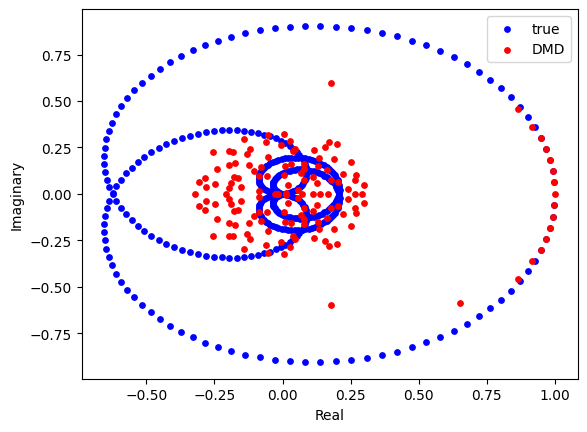

In [5]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1]) % 1
    return traj

from numpy.polynomial import Laguerre
def get_obsvervation_noisy_rotation(n1, traj):
    f = np.zeros((n1, len(traj)))
    for i in range(n1):
        p = Laguerre([0]*i + [1])
        f[i,:] = p(traj)
    return f

x = 0
v = np.pi / 320
omega = 10
n = 5000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
n1 = 150
f = get_obsvervation_noisy_rotation(n1, traj)

#DMD
X = f[:,:-1]
Y = f[:,1:]

U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

trueevalues = [np.sin(j*np.pi*delta)/(j*np.pi*delta)*np.exp(2*np.pi*j*v*(0+1j)) for j in np.arange(-200,200,1)]
# extract real part
re = [ele.real for ele in trueevalues]
# extract imaginary part
im = [ele.imag for ele in trueevalues]

# plot the complex numbers
plt.scatter(re[1:], im[1:], s=15, c='blue', label='true')

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]
# print(V)

# plot the complex numbers
plt.scatter(re[1:], im[1:], s=15, c='red', label='DMD')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.legend()
plt.show()

linear map example

(100,)


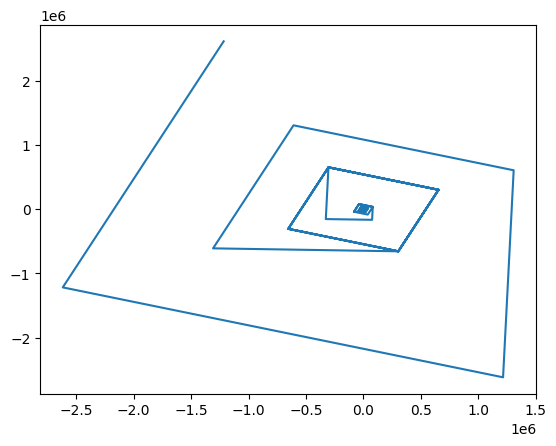

In [6]:
def linear_forward_map(x, omega, n, p1):
    if omega:
        np.random.seed(omega)
    omegas = np.random.choice([1,2], n-1, p=[p1, 1-p1])
    traj = np.zeros((n,2))
    traj[0] = x
    for i in range(1, n):
        traj[i] = np.rot90(np.diag([-omegas[i-1], omegas[i-1]])) @ traj[i-1]
    return traj

x = np.random.rand(2)
omega = 10
n = 100
p1 = 0.75
traj = linear_forward_map(x, omega, n, p1)
print(traj[:,0].shape)
plt.plot(traj[:,0], traj[:,1])

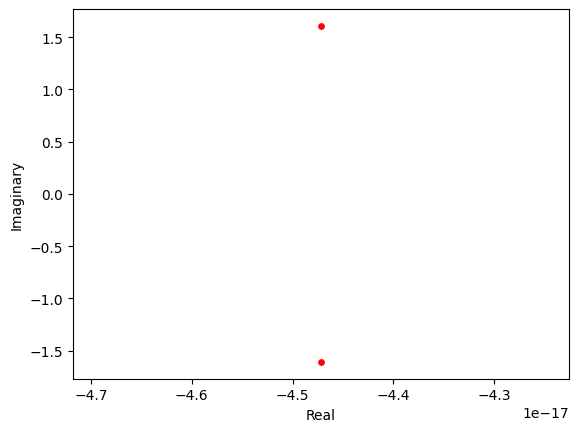

In [7]:
def get_obsvervation_linear_forward_map_expectation(x_init, m=120, mean_no=10000, p1=0.75):
    fs = np.zeros((mean_no, 2, m))
    for i in range(mean_no):
        traj = linear_forward_map(x_init, None, m, p1)
        fs[i] = traj.T
    return np.mean(fs, axis=0), fs

x = np.random.rand(2)
omega = 10
n = 1000
p1 = 0.3
f, fs = get_obsvervation_linear_forward_map_expectation(x, p1=p1)

#DMD
X = f[:,:-1]
Y = f[:,1:]
U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]

# plot the complex numbers
plt.scatter(re, im, s=15, c='red')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [8]:
W

array([-4.47183496e-17+1.6085698j, -4.47183496e-17-1.6085698j])

another arnold's circle map

In [9]:
from cmath import exp, pi, sin as exp, pi, sin
from scipy.special import jv
import cmath

def eval_approx(N, K, delta, v):
    A = np.zeros((2*N+1, 2*N+1),dtype='complex')
    for i in np.arange(-N,N+1,1):
        for j in np.arange(-N,N+1,1):
            if j == 0:
                A[i+N,j+N] = delta*cmath.exp(2*cmath.pi*(0+1j)*j*v)*jv(j-i, j*K)
            else:
                A[i+N,j+N] = cmath.sin(cmath.pi*delta*j)/(delta*cmath.pi*j)*cmath.exp(2*cmath.pi*(0+1j)*j*v)*jv(j-i, j*K)
    w, v = np.linalg.eig(A)
    return w, v, A

delta = 0.01
N = 1024
K = 1
v = 1/2
w, v, A = eval_approx(N, K, delta, v)

# extract real part
re = [ele.real for ele in w]
# extract imaginary part
im = [ele.imag for ele in w]

trueevalues = [re, im]

Laguerre basis

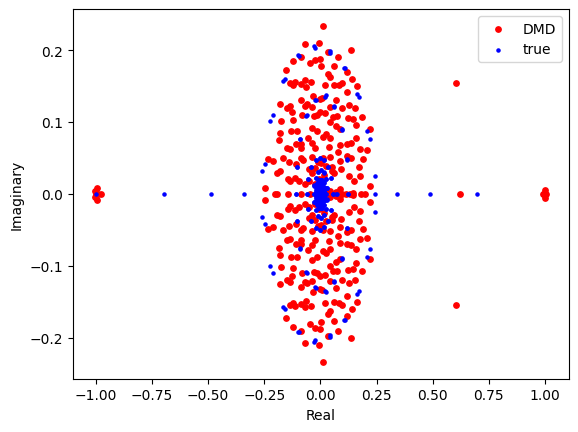

In [10]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1] + np.sin(2*np.pi*traj[-1]/2*np.pi)) % 1
    return traj

from numpy.polynomial import Laguerre
def get_obsvervation_noisy_rotation(n1, traj):
    f = np.zeros((n1, len(traj)))
    for i in range(n1):
        p = Laguerre([0]*i + [1])
        f[i,:] = p(traj)
    return f

def get_obsvervation_noisy_rotation_expectation(x_init=0, m=5000, v=np.pi/320, delta=0.01, n1=150, mean_no=100):
    fs = np.zeros((mean_no, 2*n1, m))
    for i in range(mean_no):
        traj = noisy_rotation(x_init, v, None, m, delta)
        fs[i] = get_obsvervation_noisy_rotation(n1, traj)
    return np.mean(fs, axis=0), fs

x = 0
v = 1/2
omega = 10
n = 5000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
n1 = 300
f = get_obsvervation_noisy_rotation(n1, traj)

#DMD
X = f[:,:-1]
Y = f[:,1:]
U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]

# plot the complex numbers
plt.scatter(re[:], im[:], s=15, c='red', label='DMD')
plt.scatter(trueevalues[0], trueevalues[1], s=5, c='blue', label='true')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.legend()
plt.show()

Fourier basis

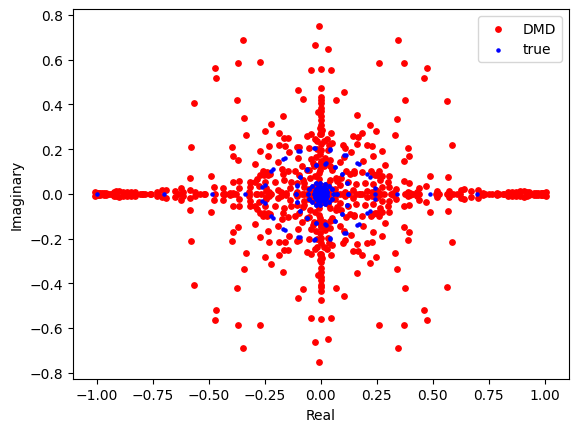

In [11]:
def noisy_rotation(x, v, omega, n, delta):
    if omega:
        np.random.seed(omega)
    omegas = np.random.uniform(-delta/2, delta/2, n-1)
    traj = np.zeros(n)
    traj[0] = x
    for i in range(1, n):
        traj[i] = (traj[i-1] + v + omegas[i-1] + np.sin(2*np.pi*traj[-1]/2*np.pi)) % 1
    return traj

def get_obsvervation_noisy_rotation(n1, traj):
    f = np.zeros((2*n1, len(traj)))
    for i in range(n1):
        f[i,:] = np.cos(2*i*np.pi*traj)
        f[i+n1,:] = np.sin(2*i*np.pi*traj)
    return f

def get_obsvervation_noisy_rotation_expectation(x_init=0, m=5000, v=np.pi/320, delta=0.01, n1=150, mean_no=100):
    fs = np.zeros((mean_no, 2*n1, m))
    for i in range(mean_no):
        traj = noisy_rotation(x_init, v, None, m, delta)
        fs[i] = get_obsvervation_noisy_rotation(n1, traj)
    return np.mean(fs, axis=0), fs

x = 0
v = 1/2
omega = 10
n = 5000
delta = 0.01
traj = noisy_rotation(x, v, omega, n, delta)
n1 = 300
f = get_obsvervation_noisy_rotation(n1, traj)

#DMD
X = f[:,:-1]
Y = f[:,1:]
U,Sig,Vh = np.linalg.svd(X, False)
V = Vh.conj().T
Sig2 = np.diag(Sig)
S = U.conj().T @ Y @ V @ np.linalg.inv(Sig2)
W, V = np.linalg.eig(S)

# extract real part
re = [ele.real for ele in W]
# extract imaginary part
im = [ele.imag for ele in W]

# plot the complex numbers
plt.scatter(re[4:], im[4:], s=15, c='red', label='DMD')
plt.scatter(trueevalues[0], trueevalues[1], s=5, c='blue', label='true')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.legend()
plt.show()